In [1]:
# [数据预处理-使用文档-PaddlePaddle深度学习平台](https://www.paddlepaddle.org.cn/documentation/docs/zh/guides/beginner/data_preprocessing_cn.html)
import paddle
print('图像数据处理方法：', paddle.vision.transforms.__all__)


图像数据处理方法： ['BaseTransform', 'Compose', 'Resize', 'RandomResizedCrop', 'CenterCrop', 'RandomHorizontalFlip', 'RandomVerticalFlip', 'Transpose', 'Normalize', 'BrightnessTransform', 'SaturationTransform', 'ContrastTransform', 'HueTransform', 'ColorJitter', 'RandomCrop', 'Pad', 'RandomRotation', 'Grayscale', 'ToTensor', 'to_tensor', 'hflip', 'vflip', 'resize', 'pad', 'rotate', 'to_grayscale', 'crop', 'center_crop', 'adjust_brightness', 'adjust_contrast', 'adjust_hue', 'normalize']


In [2]:
from paddle.vision.transforms import Resize

# 定义一个待使用的数据处理方法，这里定义了一个调整图像大小的方法
transform = Resize(size=28)


# 在自定义的数据集中应用

In [ ]:
from paddle.vision import Compose, RandomRotation
import os
import cv2
import numpy as np
from paddle.io import Dataset

class MyDataset(Dataset):
    """
    步骤一：继承 paddle.io.Dataset 类
    """
    def __init__(self, data_dir, label_path, transform=None):
        """
        步骤二：实现 __init__ 函数，初始化数据集，将样本和标签映射到列表中
        """
        super(MyDataset, self).__init__()
        self.data_list = []
        with open(label_path,encoding='utf-8') as f:
            for line in f.readlines():
                image_path, label = line.strip().split('\t')
                image_path = os.path.join(data_dir, image_path)
                self.data_list.append([image_path, label])
        # 2. 传入定义好的数据处理方法，作为自定义数据集类的一个属性
        self.transform = transform

    def __getitem__(self, index):
        """
        步骤三：实现 __getitem__ 函数，定义指定 index 时如何获取数据，并返回单条数据（样本数据、对应的标签）
        """
        image_path, label = self.data_list[index]
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = image.astype('float32')
        # 3. 应用数据处理方法到图像上
        if self.transform is not None:
            image = self.transform(image)
        label = int(label)
        return image, label

    def __len__(self):
        """
        步骤四：实现 __len__ 函数，返回数据集的样本总数
        """
        return len(self.data_list)
# 1. 定义随机旋转和改变图片大小的数据处理方法
transform = Compose([RandomRotation(10), Resize(size=32)])

custom_dataset = MyDataset('mnist/train','mnist/train/label.txt', transform)


# 下载示例图片
! wget https://paddle-imagenet-models-name.bj.bcebos.com/data/demo_images/flower_demo.png

## CenterCrop:

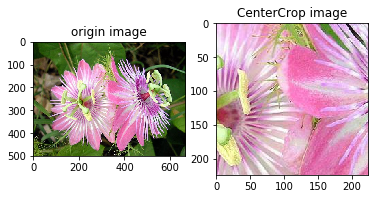

In [2]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from paddle.vision.transforms import CenterCrop

transform = CenterCrop(224)

image = cv2.imread('../imgs/flower_demo.png')

image_after_transform = transform(image)
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(image[:,:,::-1])
plt.subplot(1,2,2)
plt.title('CenterCrop image')
plt.imshow(image_after_transform[:,:,::-1])


## RandomHorizontalFlip
基于概率来执行图片的水平翻转。

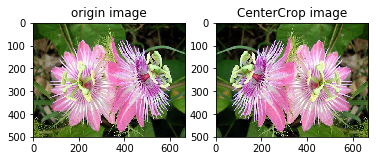

In [6]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from paddle.vision.transforms import RandomHorizontalFlip

transform = RandomHorizontalFlip(0.5)

image = cv2.imread('../imgs/flower_demo.png')

image_after_transform = transform(image)
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(image[:,:,::-1])
plt.subplot(1,2,2)
plt.title('CenterCrop image')
plt.imshow(image_after_transform[:,:,::-1])

## ColorJitter
随机调整图像的亮度、对比度、饱和度和色调。

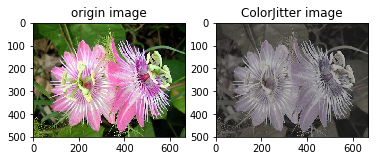

In [7]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from paddle.vision.transforms import ColorJitter

transform = ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)

image = cv2.imread('../imgs/flower_demo.png')

image_after_transform = transform(image)
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(image[:,:,::-1])
plt.subplot(1,2,2)
plt.title('ColorJitter image')
plt.imshow(image_after_transform[:,:,::-1])


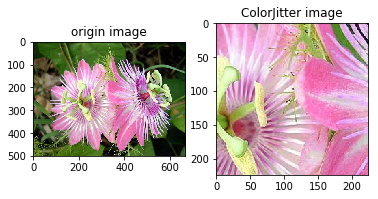

In [8]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from paddle.vision.transforms import RandomCrop

transform = RandomCrop(224)

image = cv2.imread('../imgs/flower_demo.png')

image_after_transform = transform(image)
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(image[:,:,::-1])
plt.subplot(1,2,2)
plt.title('ColorJitter image')
plt.imshow(image_after_transform[:,:,::-1])